In [1]:
import numpy as np
from PIL import Image
from detector import Detector
import matplotlib.pyplot as plt
import matplotlib.patches as label_box
from tqdm import tqdm
import os

### 'ckpt' represents checkpoint.

You can set `ckpt = ''` to test if your network architecture is implemented correctly.

Later on, you can set `ckpt = <path_to_weight_file>` to inspect the network outputs.

In [2]:
ckpt = 'weights/randn/model.best.pth'
detector = Detector(ckpt, use_gpu=False)


======================== warning ==========================
This detector uses "RGB" input convention by default
If you are using Opencv, the image is likely to be in "BRG"!!!



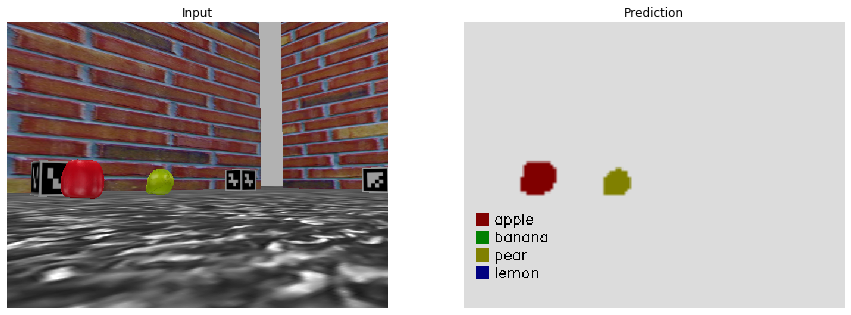

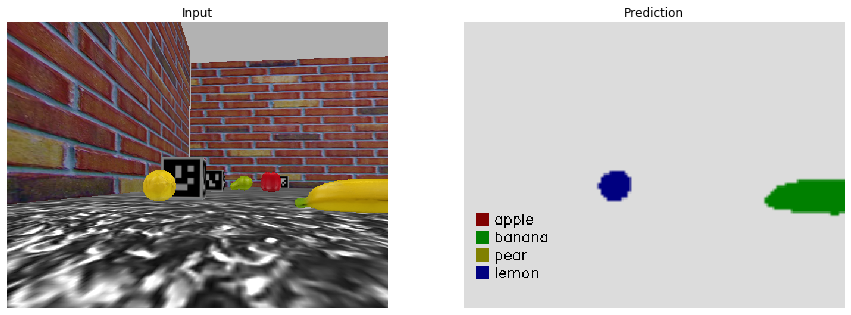

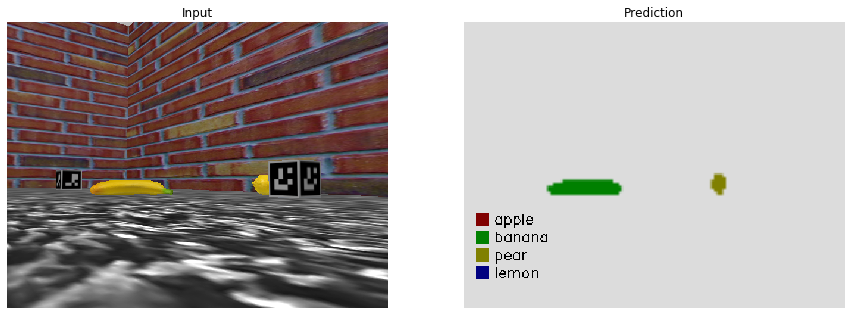

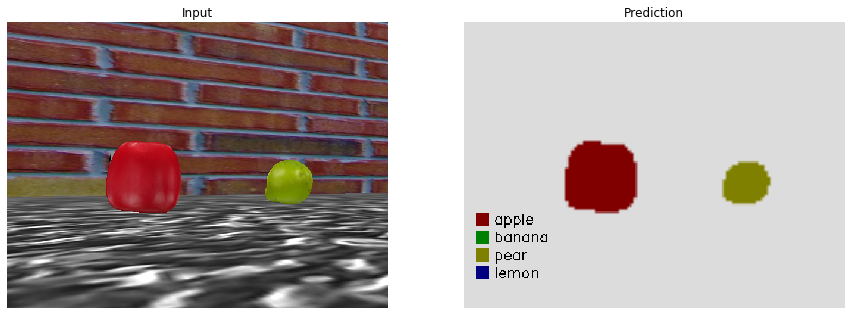

In [3]:
test_dir = "test_images/sim"
pred_dir = os.path.join(test_dir, "pred")
os.makedirs(pred_dir, exist_ok=True)
all_test_images = [file for file in os.listdir(test_dir) if file.endswith('.png')] 
for image_name in all_test_images:
    np_img = np.array(Image.open(os.path.join(test_dir, image_name)))
    pred, colour_map = detector.detect_single_image(np_img)
    title = ["Input", "Prediction"]
    pics = [np_img, colour_map]
    fig, axs = plt.subplots(1, 2, figsize=(15, 10))
    axs[0].imshow(pics[0], interpolation='nearest')
    axs[0].set_title(title[0])
    axs[1].imshow(pics[1], interpolation='nearest')
    axs[1].set_title(title[1])
    axs[0].axis('off')
    axs[1].axis('off')
    path = os.path.join(pred_dir, image_name)
    plt.savefig(os.path.join(pred_dir, image_name[:-4]+'.jpg'))